<a href="https://colab.research.google.com/github/SaiPrasanth212/Coding-Ninjas-Data-Science-and-Machine-Learning/blob/main/Deep_Learning_project_Lending_Club_Loan_Data_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Step 0: Import the required libraries

In [ ]:
import numpy as np
import pandas as pd

Step1: Gather/import the Data from csv file

In [ ]:
loan_data = pd.read_csv("/content/drive/My Drive/Colab Notebooks/All Datasets/loan_data.csv")

* Get the information of data

In [ ]:
loan_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   credit.policy      9578 non-null   int64  
 1   purpose            9578 non-null   object 
 2   int.rate           9578 non-null   float64
 3   installment        9578 non-null   float64
 4   log.annual.inc     9578 non-null   float64
 5   dti                9578 non-null   float64
 6   fico               9578 non-null   int64  
 7   days.with.cr.line  9578 non-null   float64
 8   revol.bal          9578 non-null   int64  
 9   revol.util         9578 non-null   float64
 10  inq.last.6mths     9578 non-null   int64  
 11  delinq.2yrs        9578 non-null   int64  
 12  pub.rec            9578 non-null   int64  
 13  not.fully.paid     9578 non-null   int64  
dtypes: float64(6), int64(7), object(1)
memory usage: 1.0+ MB


In [ ]:
loan_data.head(2)

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0


Step2: Check the NaN values in the dataset completely

In [ ]:
#check the NaN in the entire Dataset
loan_data.isnull().values.any()

False

In [ ]:
#Check any NaN value count in the Dataset
loan_data.isnull().sum().sum()

0

In [ ]:
loan_data.purpose.value_counts()

debt_consolidation    3957
all_other             2331
credit_card           1262
home_improvement       629
small_business         619
major_purchase         437
educational            343
Name: purpose, dtype: int64

In [ ]:
loan_data['purpose'].value_counts()

debt_consolidation    3957
all_other             2331
credit_card           1262
home_improvement       629
small_business         619
major_purchase         437
educational            343
Name: purpose, dtype: int64

In [ ]:
loan_data.purpose.unique()

array(['debt_consolidation', 'credit_card', 'all_other',
       'home_improvement', 'small_business', 'major_purchase',
       'educational'], dtype=object)

In [ ]:
data = loan_data

In [ ]:
#Check the balance of dataset
loan_data['credit.policy'].value_counts()

1    7710
0    1868
Name: credit.policy, dtype: int64

**The Dataset is clear and it is not having any NaN values in it**

#**Task 1**
**EDA Process for the Data set**




**1.Feature Transformation**
* Transform categorical values into numerical values (discrete)

# Convert the Feature and Label into 2D NP Array

In [ ]:
features = loan_data.iloc[:,1:].values
features1 = features
#-> check the shape
print(features1.shape)
features1[0:1]
#features[0:1]

(9578, 13)


array([['debt_consolidation', 0.1189, 829.1, 11.35040654, 19.48, 737,
        5639.958333, 28854, 52.1, 0, 0, 0, 0]], dtype=object)

In [ ]:
label = loan_data.iloc[:,0].values
#Check the shape
print(label.shape)
# Check the values
label[0:1]

(9578,)


array([1])

#Option1 Encoding of Purpose field

* Using Label Encoder and One Hot Encoder

In [ ]:
loan_data.head(2)

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0


In [ ]:
#Using LabelEncoder
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
data.purpose = le.fit_transform(data.purpose)
data.head(2)

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,1,2,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0
1,1,1,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0


In [ ]:
loan_data.head(2)

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,1,2,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0
1,1,1,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0


In [ ]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
ct = ColumnTransformer([('purpose', OneHotEncoder(), [0])], remainder = 'passthrough')
features1 = ct.fit_transform(features1)

In [ ]:
features1[0:1]

array([[0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.1189, 829.1, 11.35040654,
        19.48, 737, 5639.958333, 28854, 52.1, 0, 0, 0, 0]], dtype=object)

#Option 2 One Hot Encoder Directly -> EASY Method

In [ ]:
#Old features
features[0:1]

array([['debt_consolidation', 0.1189, 829.1, 11.35040654, 19.48, 737,
        5639.958333, 28854, 52.1, 0, 0, 0, 0]], dtype=object)

In [ ]:
from sklearn.preprocessing import OneHotEncoder
ohep = OneHotEncoder(sparse=False)
oPurpose = ohep.fit_transform(features[:,0].reshape(-1,1))
oPurpose[0:1]

array([[0., 0., 1., 0., 0., 0., 0.]])

In [ ]:
 features = np.concatenate((oPurpose, features[:,1:]), axis = 1)

In [ ]:
print(features.shape)
features[0:1]

(9578, 19)


array([[0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.1189, 829.1, 11.35040654,
        19.48, 737, 5639.958333, 28854, 52.1, 0, 0, 0, 0]], dtype=object)

#**Task 2**
#**Exploratory data analysis of different factors of the dataset.**




In [ ]:
features[0:1]

array([[0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.1189, 829.1, 11.35040654,
        19.48, 737, 5639.958333, 28854, 52.1, 0, 0, 0, 0]], dtype=object)

In [ ]:
label[0:1]

array([1])

In [ ]:
loan_data.head()

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,1,2,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0
1,1,1,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0
2,1,2,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0
3,1,2,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0
4,1,1,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0


In [ ]:
loan_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   credit.policy      9578 non-null   int64  
 1   purpose            9578 non-null   int64  
 2   int.rate           9578 non-null   float64
 3   installment        9578 non-null   float64
 4   log.annual.inc     9578 non-null   float64
 5   dti                9578 non-null   float64
 6   fico               9578 non-null   int64  
 7   days.with.cr.line  9578 non-null   float64
 8   revol.bal          9578 non-null   int64  
 9   revol.util         9578 non-null   float64
 10  inq.last.6mths     9578 non-null   int64  
 11  delinq.2yrs        9578 non-null   int64  
 12  pub.rec            9578 non-null   int64  
 13  not.fully.paid     9578 non-null   int64  
dtypes: float64(6), int64(8)
memory usage: 1.0 MB


In [ ]:
loan_data.shape

(9578, 14)

In [ ]:
loan_data.describe()

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
count,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9.578000e+03,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000
mean,0.804970,1.944038,0.122640,319.089413,10.932117,12.606679,710.846314,4560.767197,1.691396e+04,46.799236,1.577469,0.163708,0.062122,0.160054
std,0.396245,1.686881,0.026847,207.071301,0.614813,6.883970,37.970537,2496.930377,3.375619e+04,29.014417,2.200245,0.546215,0.262126,0.366676
min,0.000000,0.000000,0.060000,15.670000,7.547502,0.000000,612.000000,178.958333,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,1.000000,0.103900,163.770000,10.558414,7.212500,682.000000,2820.000000,3.187000e+03,22.600000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,2.000000,0.122100,268.950000,10.928884,12.665000,707.000000,4139.958333,8.596000e+03,46.300000,1.000000,0.000000,0.000000,0.000000
75%,1.000000,2.000000,0.140700,432.762500,11.291293,17.950000,737.000000,5730.000000,1.824950e+04,70.900000,2.000000,0.000000,0.000000,0.000000
max,1.000000,6.000000,0.216400,940.140000,14.528354,29.960000,827.000000,17639.958330,1.207359e+06,119.000000,33.000000,13.000000,5.000000,1.000000


In [ ]:
loan_data.columns

Index(['credit.policy', 'purpose', 'int.rate', 'installment', 'log.annual.inc',
       'dti', 'fico', 'days.with.cr.line', 'revol.bal', 'revol.util',
       'inq.last.6mths', 'delinq.2yrs', 'pub.rec', 'not.fully.paid'],
      dtype='object')

In [ ]:
loan_data.nunique()

credit.policy           2
purpose                 7
int.rate              249
installment          4788
log.annual.inc       1987
dti                  2529
fico                   44
days.with.cr.line    2687
revol.bal            7869
revol.util           1035
inq.last.6mths         28
delinq.2yrs            11
pub.rec                 6
not.fully.paid          2
dtype: int64

In [ ]:
loan_data['credit.policy'].unique()

array([1, 0])

In [ ]:
loan_data['purpose'].unique()

array([2, 1, 0, 4, 6, 5, 3])

In [ ]:
  #EDA Analysis
#1. Dataset should not have any null values
# Check the null values i.e: NaN or Missing values 
loan_data.isnull().any()

credit.policy        False
purpose              False
int.rate             False
installment          False
log.annual.inc       False
dti                  False
fico                 False
days.with.cr.line    False
revol.bal            False
revol.util           False
inq.last.6mths       False
delinq.2yrs          False
pub.rec              False
not.fully.paid       False
dtype: bool

In [ ]:
loan_data.isnull().sum()

credit.policy        0
purpose              0
int.rate             0
installment          0
log.annual.inc       0
dti                  0
fico                 0
days.with.cr.line    0
revol.bal            0
revol.util           0
inq.last.6mths       0
delinq.2yrs          0
pub.rec              0
not.fully.paid       0
dtype: int64

In [ ]:
#2. Identify the Neccessary fields in DataSet and remove the noise in Dataset
#No need to remove any fields 

In [ ]:
#3 Identify the relation between variables through EDA
# Relationship Analyis
# Corr-relation Matrix: It is a table gives the relationship between the variables.
# It summerizes the data and diagnostic for advanced analysis.
#
corelatiion = loan_data.corr()

In [ ]:
import seaborn as sns

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


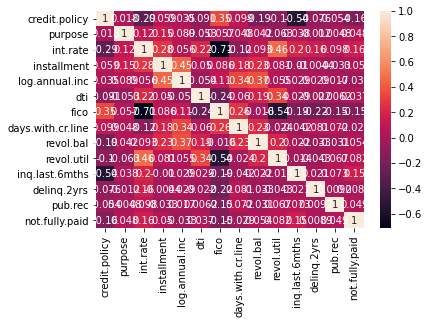

In [ ]:
sns.heatmap(corelatiion, xticklabels=corelatiion.columns, yticklabels=corelatiion.columns, annot=True)

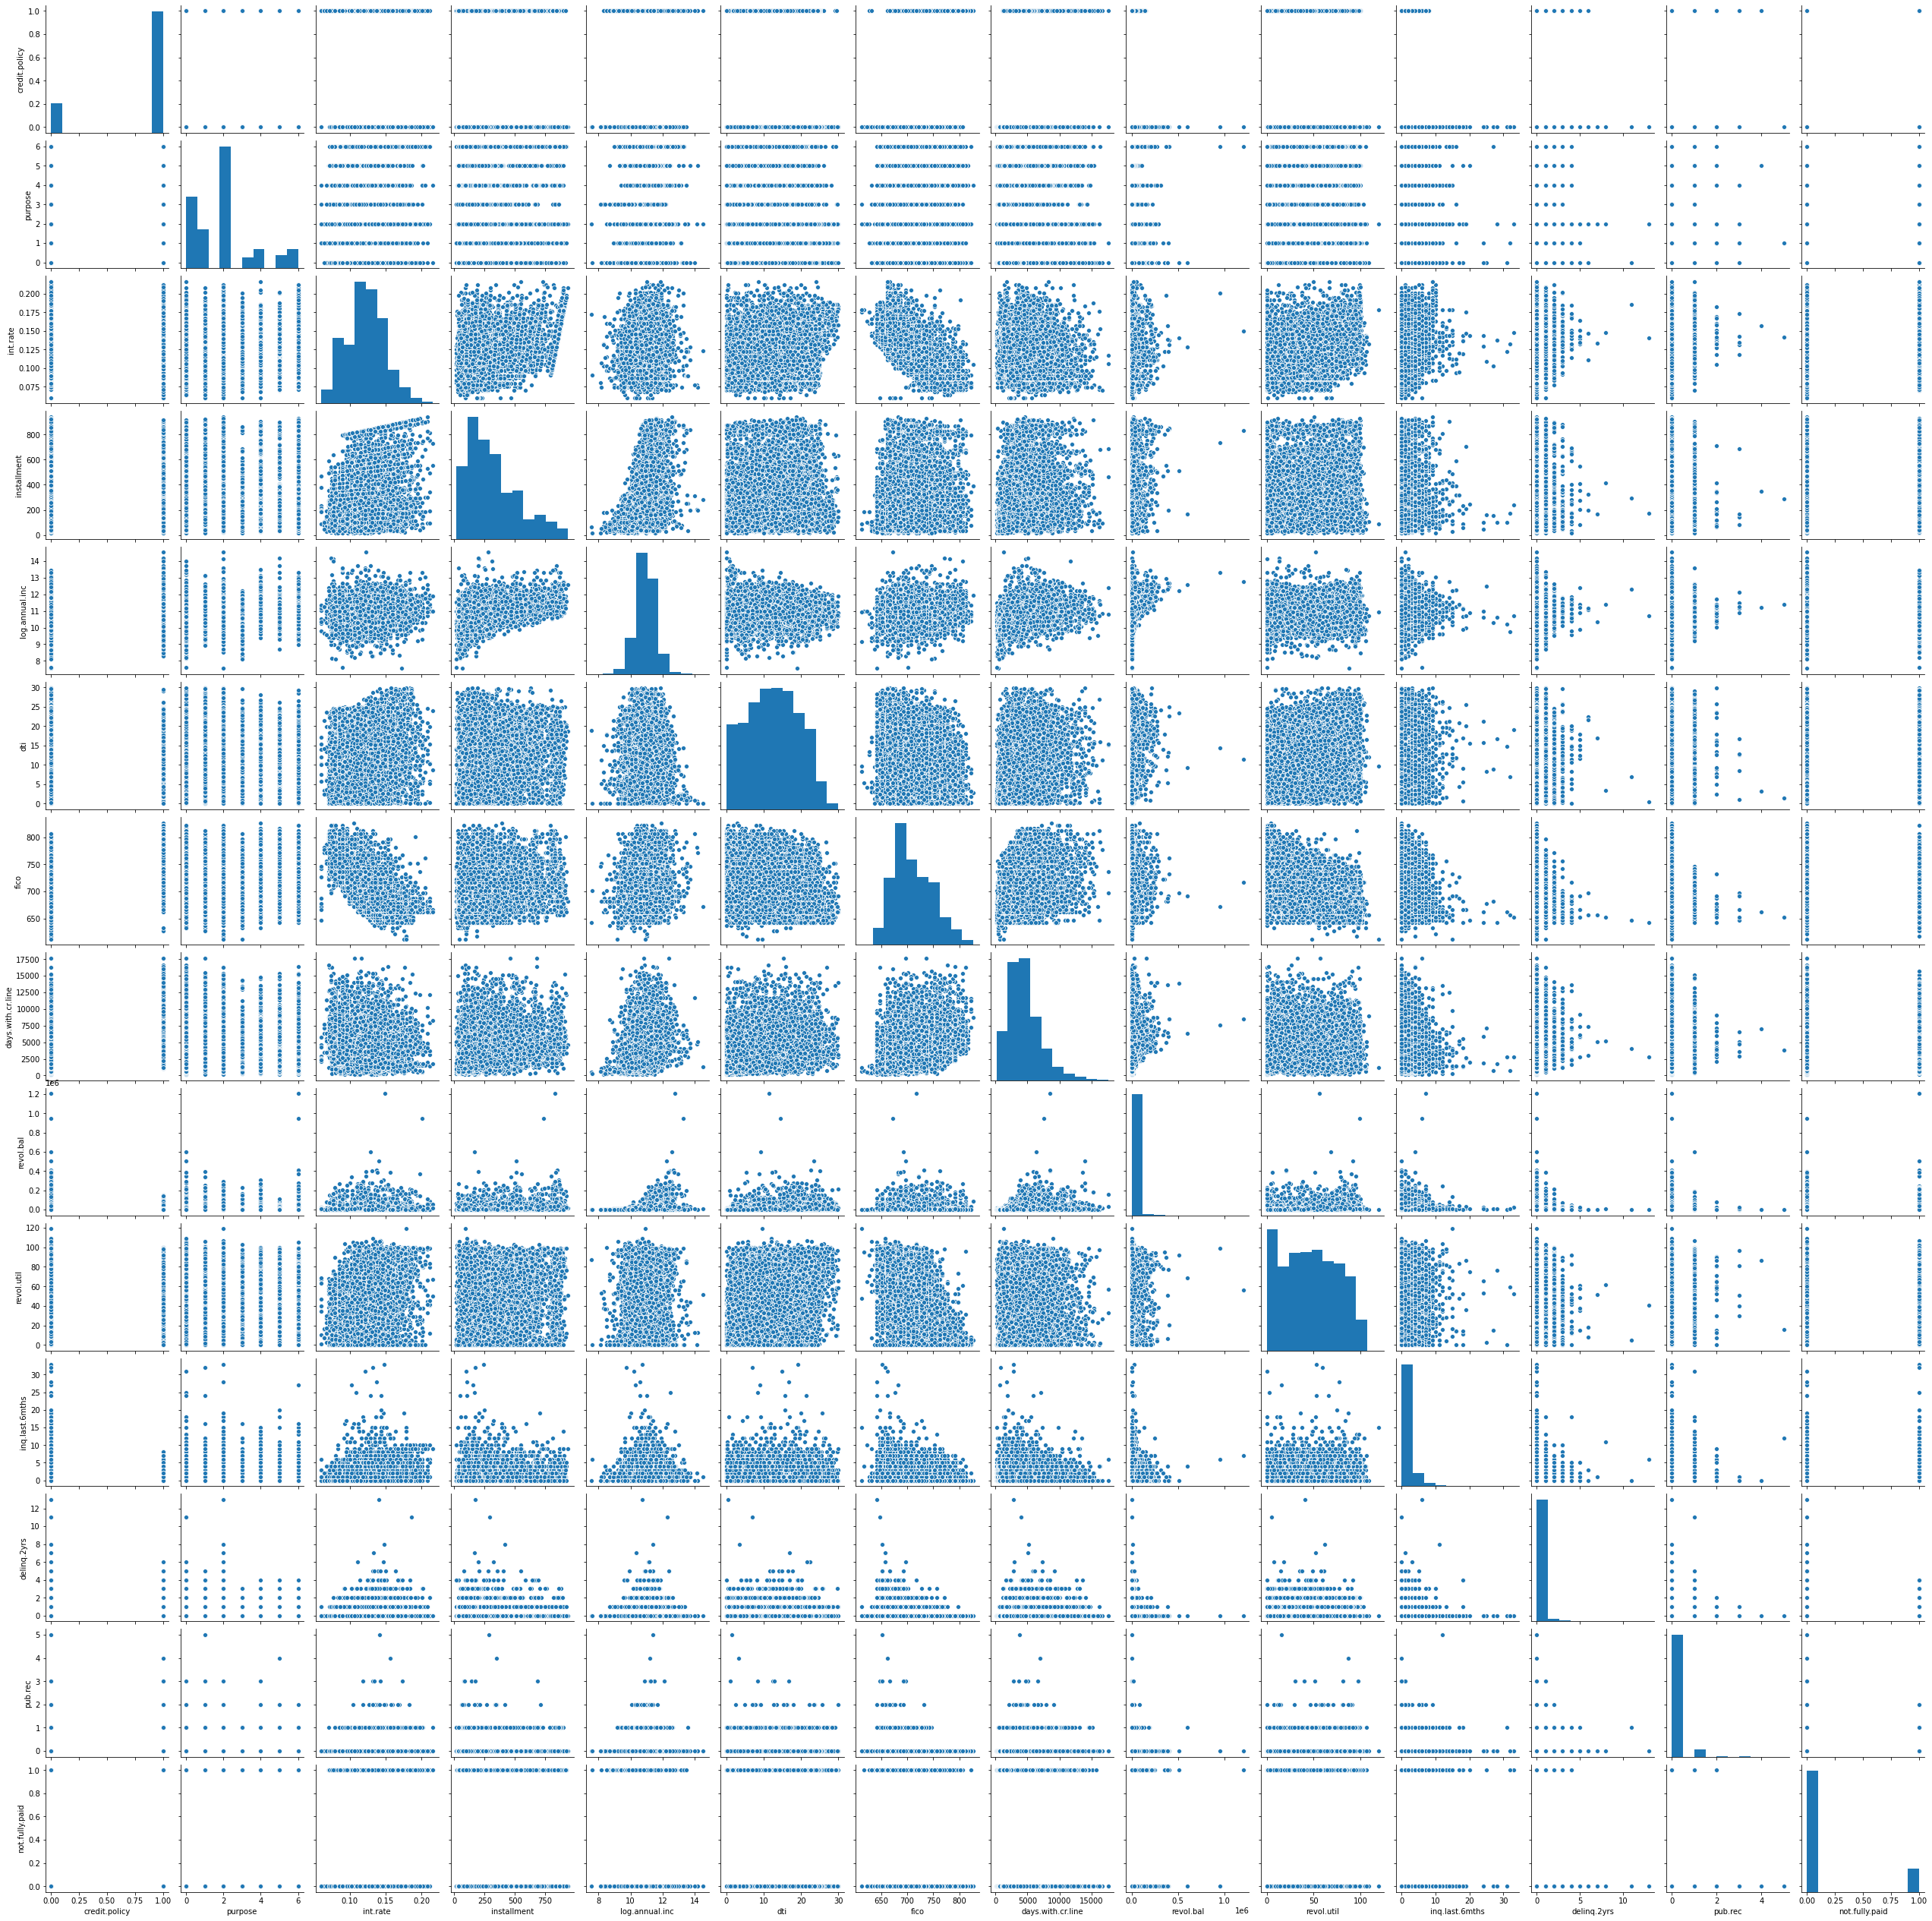

In [ ]:
sns.pairplot(loan_data)

In [ ]:
loan_data.columns

Index(['credit.policy', 'purpose', 'int.rate', 'installment', 'log.annual.inc',
       'dti', 'fico', 'days.with.cr.line', 'revol.bal', 'revol.util',
       'inq.last.6mths', 'delinq.2yrs', 'pub.rec', 'not.fully.paid'],
      dtype='object')

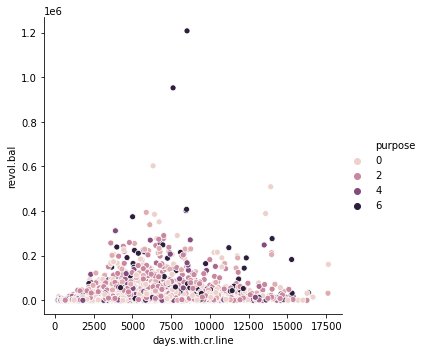

In [ ]:
#Scatter plot
sns.relplot(x='days.with.cr.line', y= 'revol.bal', hue='purpose', data=loan_data)

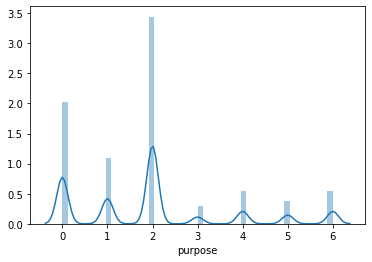

In [ ]:
sns.distplot(loan_data['purpose' ])

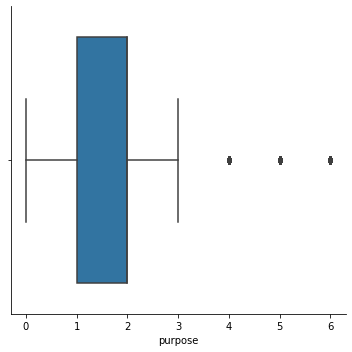

In [ ]:
sns.catplot(x='purpose', kind='box', data=loan_data)

#**Task 3**

#**Additional Feature Engineering**

* You will check the correlation between features and will drop those features which have a strong correlation

* This will help reduce the number of features and will leave you with the most relevant features


In [ ]:
#4. Calculate the VIF: Variance Inflation factor

# VIF = 1 / (1-R2)

#If greater the VIF denotes greater correlation, Generally VIF above 5 indicates 
#High Multicolinearity.
from statsmodels.stats.outliers_influence import variance_inflation_factor

x = loan_data[['purpose', 'int.rate', 'installment', 'log.annual.inc',
       'dti', 'fico', 'days.with.cr.line', 'revol.bal', 'revol.util',
       'inq.last.6mths', 
       'delinq.2yrs', 'pub.rec', 'not.fully.paid']]

vif_data  = pd.DataFrame()
vif_data["fea"] = x.columns

vif_data["VIF"] = [variance_inflation_factor(x.values, i)
                          for i in range(len(x.columns))]

print(vif_data)               



                  fea         VIF
0             purpose    2.471018
1            int.rate   36.070135
2         installment    4.244331
3      log.annual.inc  377.573969
4                 dti    5.106416
5                fico  279.974825
6   days.with.cr.line    5.254915
7           revol.bal    1.562564
8          revol.util    5.731715
9      inq.last.6mths    1.665259
10        delinq.2yrs    1.201695
11            pub.rec    1.100415
12     not.fully.paid    1.248180


In [ ]:
#5. Check the outliers 

#**Task 4 Modeling**

#**After applying EDA and feature engineering, you are now ready to build the predictive models

In this part, you will create a deep learning model using Keras with Tensorflow backend

#**Rules for Classification for ML**
1. Data must be complete
2. Data must be strictly numeric
3. Features and label must be in the form of NumPy array
4. Feature must be a 2D NP array
5. Label must be 1D NP array
6. Normalization of features is optional

In [ ]:
features.ndim

2

In [ ]:
label.ndim

1

In [ ]:
# Split the dataset
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(features,
                                                    label,
                                                    test_size = 0.2,
                                                    random_state = 100)

In [ ]:
# Modelling using 
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X_train, y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
#Check the quality of the model
#1. Check whether the model is generalised or not
print(model.score(X_train, y_train))
print(model.score(X_test, y_test))
#2. Check the quality of model

0.896110676063691
0.8799582463465553


**Deep Learning**

#**Rules for Classification for DL**
1. Data must be complete
2. Data must be strictly numeric
3. Features and label must be in the form of NumPy array
4. Feature must be a 2D NP array
5. Label must be 2D NP array
6. Normalization of Features is mandatory
7. For Binary Classification, label must be represented as 0/1 (pd.replace)
8. For Multi classification the label must be Discrete Numerical (Setosa = 0, Versicolor = 1, Virginica =2 ) -> It is in ascending order

In [ ]:
# Convert the label to 2D NP Array
label = loan_data.iloc[:,[0]].values
#Check the shape
print(label.shape)
# Check the values
label[0:1]

(9578, 1)


array([[1]])

In [ ]:
label.ndim

2

In [ ]:
#Feature Normalization

from sklearn.preprocessing import RobustScaler
rbFeatures = RobustScaler()
features = rbFeatures.fit_transform(features)

In [ ]:
# Remodel
# Split the dataset
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(features,
                                                    label,
                                                    test_size = 0.2,
                                                    random_state = 100)

In [ ]:
features[0:1]

array([[ 0.        ,  0.        ,  1.        ,  0.        ,  0.        ,
         0.        ,  0.        , -0.08695652,  2.08240007,  0.57516008,
         0.6346915 ,  0.54545455,  0.51546392,  1.34492946,  0.12008282,
        -0.5       ,  0.        ,  0.        ,  0.        ]])

In [ ]:
print(features.shape)

(9578, 19)


In [ ]:
19*3

57

In [ ]:
import tensorflow as tf

In [ ]:
# Architect the Modelling for DL 

#Step1: Create the Sequential Model object
model = tf.keras.models.Sequential()

# Step2: Crete a Dense Layer
#units: No of neurons in hidden layer  = 3 * input
#activation : Which Activation function to apply
#input_shape : (NoOfColsInFeatureArray)

model.add(tf.keras.layers.Dense(units = 57, activation='relu',input_shape = (19,)))
model.add(tf.keras.layers.Dense(units = 57, activation='relu'))
model.add(tf.keras.layers.Dense(units = 57, activation='relu'))

#Output is binary classification So use Sigmoid in the output layer
model.add(tf.keras.layers.Dense(units = 1, activation='sigmoid'))

In [ ]:
#Compile
#Accuracy = diagonal / total
# For classification loss function  needs to be used
#1. binary_crossentropy (Binary Classification)
#2. categorical_crossentropy (( Multiclass classification))
#Something which is inbuilt use "", if it is external then create object for it 
#ex: accuracy us inbuilt parameter so it should pass in "accuracy"
model.compile(optimizer="sgd", loss="binary_crossentropy", metrics=["accuracy"])

In [ ]:
#Fit the model
model.fit(X_train, y_train, epochs=1000, validation_data=(X_test,y_test))

Epoch 1/1000
240/240 [==============================] - 1s 3ms/step - loss: 0.5017 - accuracy: 0.8045 - val_loss: 0.4055 - val_accuracy: 0.8361
Epoch 2/1000
240/240 [==============================] - 1s 2ms/step - loss: 0.3419 - accuracy: 0.8730 - val_loss: 0.3155 - val_accuracy: 0.8852
Epoch 3/1000
240/240 [==============================] - 1s 2ms/step - loss: 0.2803 - accuracy: 0.9021 - val_loss: 0.2839 - val_accuracy: 0.8909
Epoch 4/1000
240/240 [==============================] - 1s 2ms/step - loss: 0.2561 - accuracy: 0.9045 - val_loss: 0.2720 - val_accuracy: 0.8873
Epoch 5/1000
240/240 [==============================] - 1s 2ms/step - loss: 0.2444 - accuracy: 0.9066 - val_loss: 0.2647 - val_accuracy: 0.8883
Epoch 6/1000
240/240 [==============================] - 1s 2ms/step - loss: 0.2361 - accuracy: 0.9064 - val_loss: 0.2582 - val_accuracy: 0.8920
Epoch 7/1000
240/240 [==============================] - 1s 2ms/step - loss: 0.2297 - accuracy: 0.9096 - val_loss: 0.2539 - val_accuracy:

In [ ]:
#Score
model.evaluate(X_train,y_train)
model.evaluate(X_test,y_test)

60/60 [==============================] - 0s 1ms/step - loss: 0.2514 - accuracy: 0.9666


[0.25139275193214417, 0.9665970802307129]